In [58]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


In [59]:
#1
df = pd.read_csv("4.csv")

#2
print(df.shape)
rows = df.shape[0]
columns = df.shape[1]
print(f"Кількість записів : {rows}")
print(f"Кількість атрибутів : {columns}")
print("Атрибути:")
print(df.columns)
  


(2111, 17)
Кількість записів : 2111
Кількість атрибутів : 17
Атрибути:
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [60]:
#3
X = df.drop('NObeyesdad', axis = 1)
cat_cols = ['CAEC', 'CALC', 'MTRANS']
X = pd.get_dummies(X, columns=cat_cols, drop_first=True, dummy_na=True) 

bool_cols = ['SCC','family_history_with_overweight','FAVC', 'SMOKE']
for col in bool_cols:
    X[col] = (X[col].astype(str).str.strip().str.lower() == 'yes').astype(int)
X['Gender'] = (X['Gender'].astype(str).str.strip().str.lower() == 'Female').astype(int)
y = df['NObeyesdad']




In [61]:
#4
n_splits = 5 #можна змінити
splits = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=129)

# взяти саме 2-й спліт
for i, (train_idx, test_idx) in enumerate(splits.split(X, y)):
    if i == 1:
        second_train, second_test = train_idx, test_idx
        break

X_train = X.iloc[second_train].copy()
X_test  = X.iloc[second_test].copy()
y_train = y.iloc[second_train].copy()
y_test  = y.iloc[second_test].copy()
sets = [ y_train, y_test]
for i in sets:
    print("Кількість об’єктів кожного класу у %:")
    perc   = i.value_counts(normalize=True, dropna=False).mul(100).round(2)
    print(perc)

Кількість об’єктів кожного класу у %:
NObeyesdad
Obesity_Type_I         16.82
Obesity_Type_III       14.69
Obesity_Type_II        14.51
Overweight_Level_I     14.10
Overweight_Level_II    13.68
Normal_Weight          13.63
Insufficient_Weight    12.56
Name: proportion, dtype: float64
Кількість об’єктів кожного класу у %:
NObeyesdad
Obesity_Type_III       17.97
Obesity_Type_I         15.84
Insufficient_Weight    14.18
Overweight_Level_II    13.95
Normal_Weight          13.48
Overweight_Level_I     12.29
Obesity_Type_II        12.29
Name: proportion, dtype: float64


In [62]:
#5
model = KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier()

Accuracy для навчальної вибірки: 0.908175355450237
Кластфікаційний звіт для тестової вибірки:
                     precision    recall  f1-score   support

Insufficient_Weight       0.83      1.00      0.91        60
      Normal_Weight       0.91      0.53      0.67        57
     Obesity_Type_I       0.86      0.96      0.91        67
    Obesity_Type_II       1.00      0.96      0.98        52
   Obesity_Type_III       1.00      1.00      1.00        76
 Overweight_Level_I       0.78      0.88      0.83        52
Overweight_Level_II       0.83      0.83      0.83        59

           accuracy                           0.89       423
          macro avg       0.89      0.88      0.87       423
       weighted avg       0.89      0.89      0.88       423



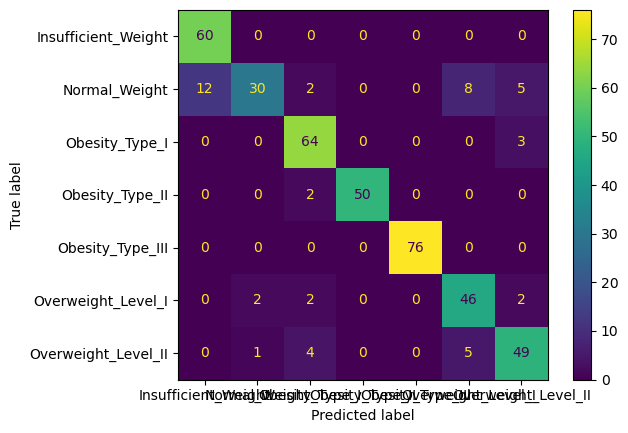

In [63]:
#6
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy для навчальної вибірки:", train_accuracy)
y_test_pred = model.predict(X_test)
    # test_accuracy = accuracy_score(y_test, y_test_pred)
    # print("Accuracy для тестової вибірки:", test_accuracy)

print("Кластфікаційний звіт для тестової вибірки:")
print(classification_report(y_test,y_test_pred,zero_division=0))
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 1


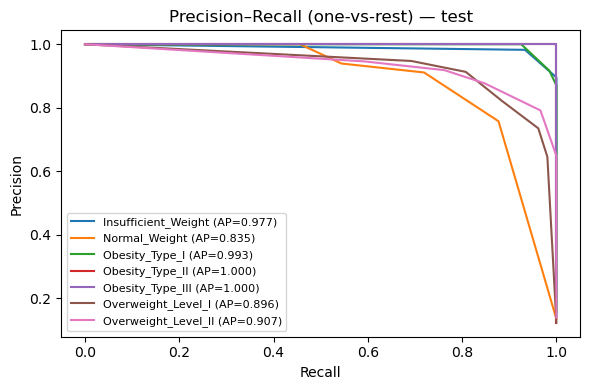

Macro AP: 0.944
Micro AP: 0.951
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 2


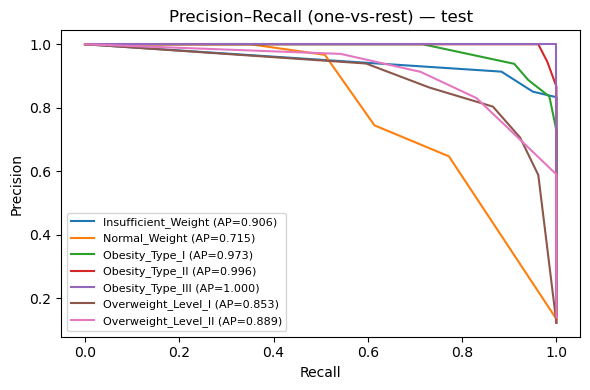

Macro AP: 0.905
Micro AP: 0.916
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 3


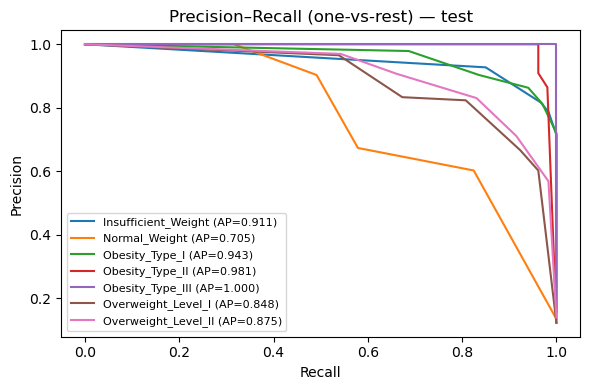

Macro AP: 0.895
Micro AP: 0.912
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 4


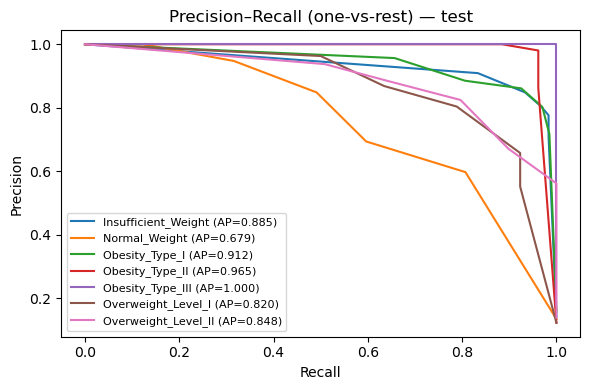

Macro AP: 0.873
Micro AP: 0.893
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 5


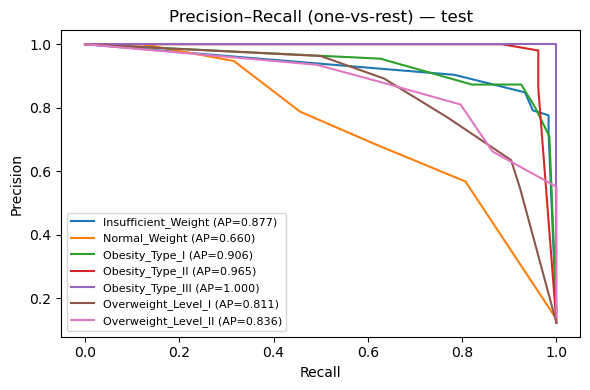

Macro AP: 0.865
Micro AP: 0.888
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 6


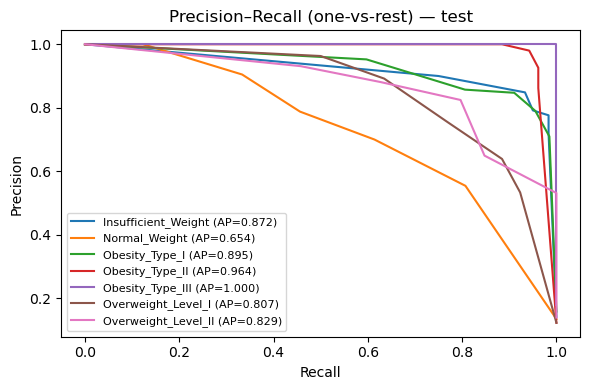

Macro AP: 0.860
Micro AP: 0.884
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 7


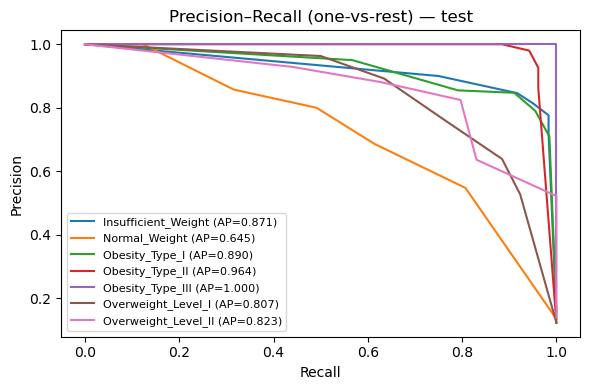

Macro AP: 0.857
Micro AP: 0.882
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 8


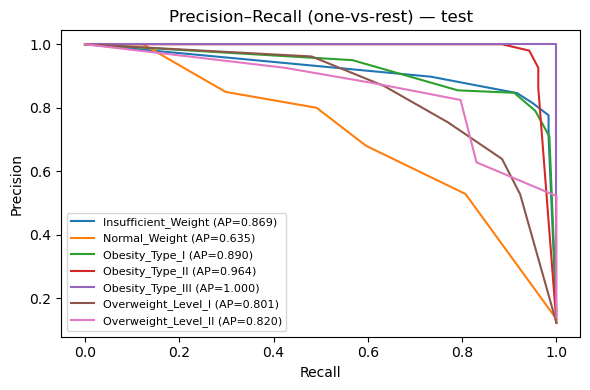

Macro AP: 0.854
Micro AP: 0.880
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 9


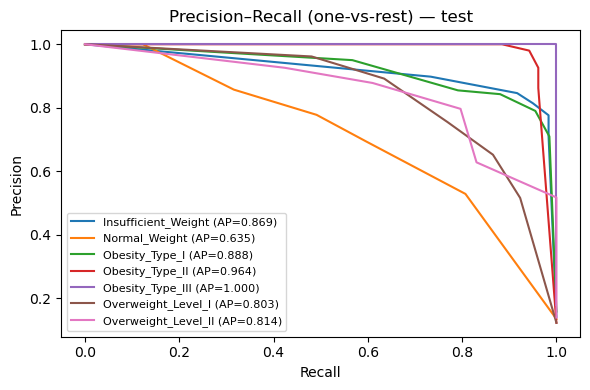

Macro AP: 0.853
Micro AP: 0.880
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 10


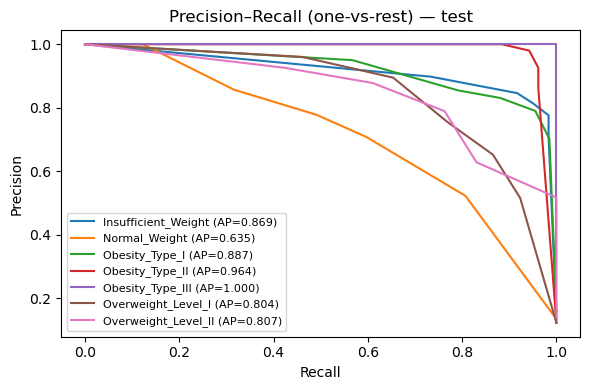

Macro AP: 0.852
Micro AP: 0.879
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 11


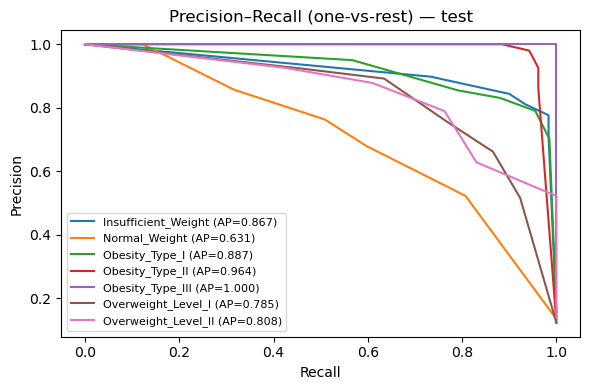

Macro AP: 0.849
Micro AP: 0.876
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 12


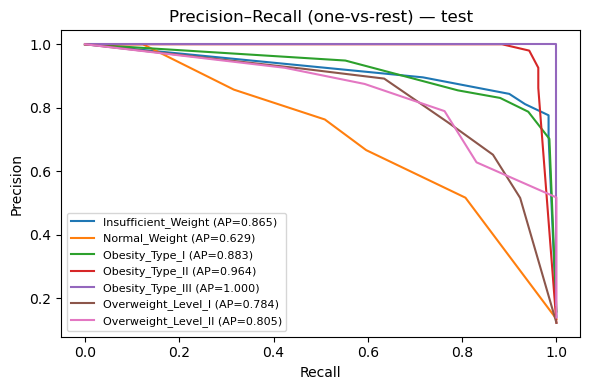

Macro AP: 0.847
Micro AP: 0.875
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 13


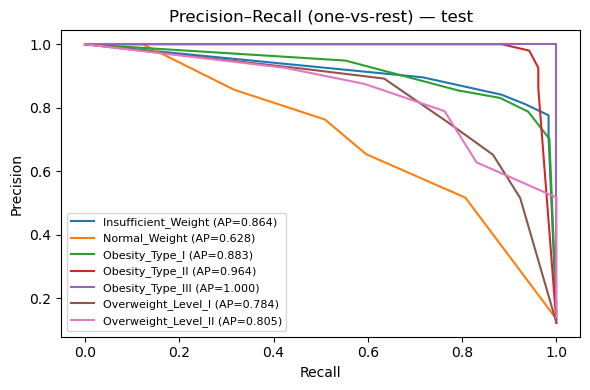

Macro AP: 0.847
Micro AP: 0.875
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 14


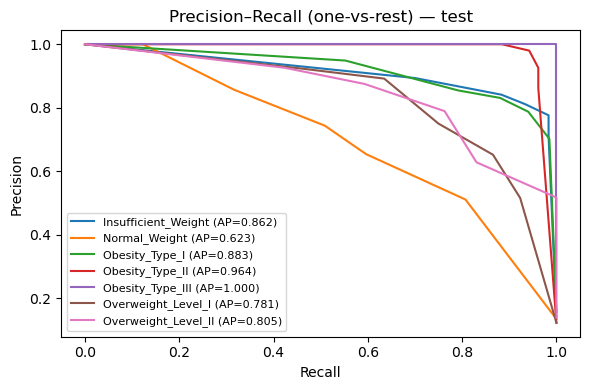

Macro AP: 0.845
Micro AP: 0.874
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 15


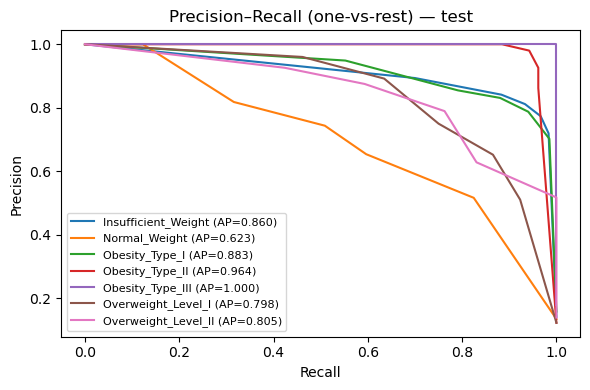

Macro AP: 0.848
Micro AP: 0.877
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 16


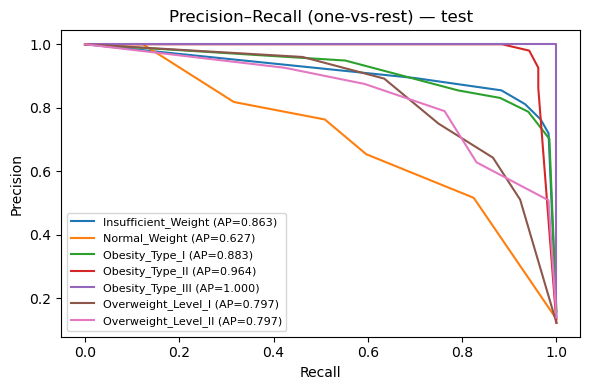

Macro AP: 0.847
Micro AP: 0.876
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 17


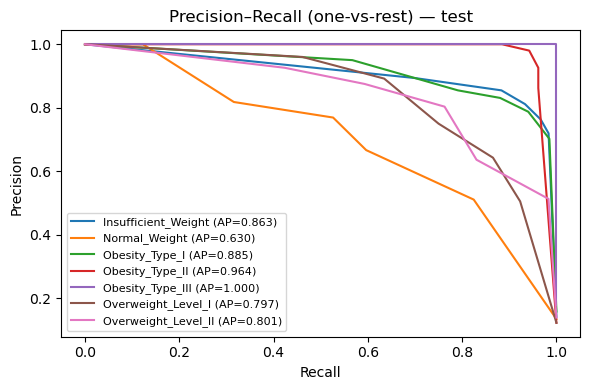

Macro AP: 0.848
Micro AP: 0.877
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 18


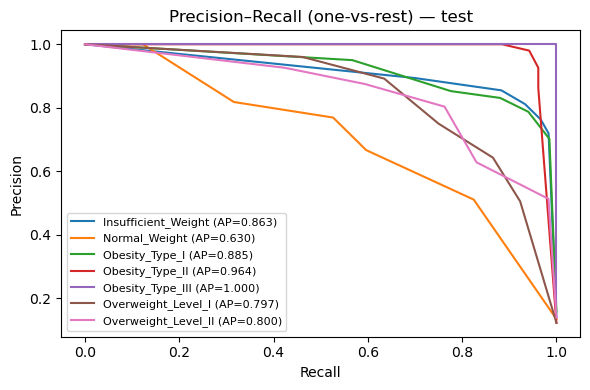

Macro AP: 0.848
Micro AP: 0.876
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 19


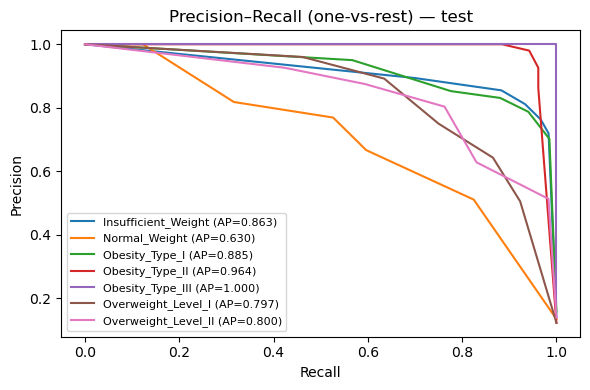

Macro AP: 0.848
Micro AP: 0.876
СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: 20


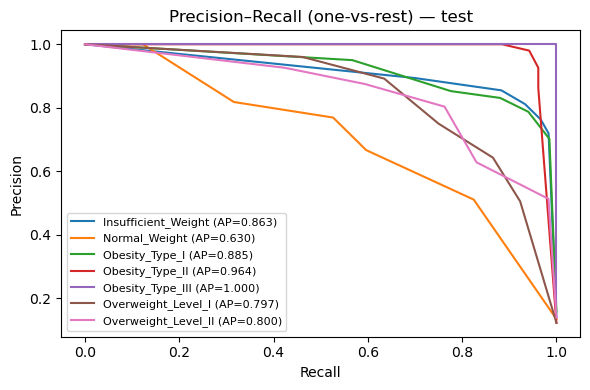

Macro AP: 0.848
Micro AP: 0.876


In [64]:

for p in range (1,21):
    print(f"СТЕПІНЬ МЕТРИКИ МІНКОВСЬКОГО: {p}")
    model = KNeighborsClassifier(p=p)
    model.fit(X_train, y_train)

    classes =  np.unique(y_test)
    Y_test = label_binarize(y_test, classes=classes)        
    Y_score = model.predict_proba(X_test)                      

# ROC-AUC
    # plt.figure(figsize=(6, 4))
    # for i, cls in enumerate(classes):
    #     fpr, tpr, _ = roc_curve(Y_test[:, i], Y_score[:, i])
    #     plt.plot(fpr, tpr, label=f"{cls} (AUC={auc(fpr, tpr):.3f})")
    # plt.plot([0, 1], [0, 1], linestyle="--")
    # plt.xlabel("FPR")
    # plt.ylabel("TPR")
    # plt.title("ROC (one-vs-rest) — test")
    # plt.legend(loc="lower right", fontsize=8)
    # plt.tight_layout()
    # plt.show()
    # macro_auc = roc_auc_score(Y_test, Y_score, average="macro", multi_class="ovr")
    # micro_auc = roc_auc_score(Y_test, Y_score, average="micro", multi_class="ovr")
    # print(f"Macro AUC (OvR): {macro_auc:.3f}")
    # print(f"Micro AUC (OvR): {micro_auc:.3f}")


    plt.figure(figsize=(6, 4))
    for i, cls in enumerate(classes):
        prec, rec, _ = precision_recall_curve(Y_test[:, i], Y_score[:, i])
        ap = average_precision_score(Y_test[:, i], Y_score[:, i])
        plt.plot(rec, prec, label=f"{cls} (AP={ap:.3f})")
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title("Precision–Recall (one-vs-rest) — test")
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()
    macro_ap = average_precision_score(Y_test, Y_score, average="macro")
    micro_ap = average_precision_score(Y_test, Y_score, average="micro")
    print(f"Macro AP: {macro_ap:.3f}")
    print(f"Micro AP: {micro_ap:.3f}")

